## Organizing CoinID Data

In [90]:
import pandas as pd
import requests
import json
import ast
from datetime import datetime
import time
format_date = lambda x: datetime.fromtimestamp(int(x)/1000)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import regex as re
import requests
import xmltodict

In [91]:
df_coinID = pd.read_csv("../raw_data/df_coinID_index_as_columns.csv")

In [92]:
df_coinID.set_index("Unnamed: 0", inplace = True)

In [93]:
df_coinID.rename_axis(None, axis = 0, inplace = True)

In [94]:
df_coinID

,01coin,0-5x-long-algorand-token,0-5x-long-altcoin-index-token,0-5x-long-ascendex-token-token,0-5x-long-bitcoin-cash-token,0-5x-long-bitcoin-token,0-5x-long-cardano-token,0-5x-long-chainlink-token,0-5x-long-cosmos-token,0-5x-long-dogecoin-token,...,polylion,zatcoin,solo-coin,olympus-v1,safeinsure,thekey,mooncake,wolf-game-wool,misty-inu,mintstarter
id,01coin,0-5x-long-algorand-token,0-5x-long-altcoin-index-token,0-5x-long-ascendex-token-token,0-5x-long-bitcoin-cash-token,0-5x-long-bitcoin-token,0-5x-long-cardano-token,0-5x-long-chainlink-token,0-5x-long-cosmos-token,0-5x-long-dogecoin-token,...,polylion,zatcoin,solo-coin,olympus-v1,safeinsure,thekey,mooncake,wolf-game-wool,misty-inu,mintstarter
symbol,zoc,algohalf,althalf,asdhalf,bchhalf,half,adahalf,linkhalf,atomhalf,dogehalf,...,lion,zatcoin,solo,ohm,sins,tky,moon,wool,misty,mint
name,01coin,0.5X Long Algorand Token,0.5X Long Altcoin Index Token,0.5X Long AscendEx Token Token,0.5X Long Bitcoin Cash Token,0.5X Long Bitcoin Token,0.5X Long Cardano Token,0.5X Long Chainlink Token,0.5X Long Cosmos Token,0.5X Long Dogecoin Token,...,PolyLion,ZatCoin,Sologenic,Olympus v1,SafeInsure,THEKEY,MoonCake,Wolf Game Wool,Misty Inu,MintStarter
asset_platform_id,NaN,ethereum,ethereum,ethereum,ethereum,ethereum,ethereum,ethereum,ethereum,ethereum,...,polygon-pos,binance-smart-chain,xrp,ethereum,NaN,neo,binance-smart-chain,ethereum,ethereum,ethereum
platforms,{'': ''},{'ethereum': ''},{'ethereum': ''},{'ethereum': ''},{'ethereum': ''},{'ethereum': ''},{'ethereum': ''},{'ethereum': ''},{'ethereum': ''},{'ethereum': ''},...,{'polygon-pos': '0x1da554d34027ca8de74c5b1cd2f...,{'binance-smart-chain': '0x958e030e5937414b8b5...,{'xrp': ''},{'ethereum': '0x383518188c0c6d7730d91b2c03a03c...,{'': ''},{'neo': '132947096727c84c7f9e076c90f08fec3bc17...,{'binance-smart-chain': '0x2e8c05582176fa93b45...,{'ethereum': '0x8355dbe8b0e275abad27eb843f3eaf...,{'ethereum': '0x814e8f8e35ac8bab913326364ca47b...,{'ethereum': '0x583673b49ee3ae9e59c0b2fa662115...
block_time_in_minutes,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
hashing_algorithm,NeoScrypt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Quark,NaN,NaN,NaN,NaN,NaN
categories,['Masternodes'],[],[],[],[],['Leveraged Token'],[],[],[],[],...,[],['Binance Smart Chain Ecosystem'],['Finance / Banking'],"['Rebase Tokens', 'Decentralized Finance (DeFi...",['Cryptocurrency'],['Big Data'],[],[],[],[]
public_notice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"Sologenic is previously named as ""SOLO Coin""",Olympus has migrated to v2: https://www.coinge...,NaN,NaN,NaN,NaN,NaN,The following token has a variable tax functio...
additional_notices,[],[],[],[],[],[],[],[],[],[],...,[],"[""Kindly be aware of <a href='https://www.coin...",[],[],[],[],[],[],[],"[""Kindly be aware of <a href='https://www.coin..."


In [95]:
def function_check_null(coin_market_data,coin_community_data):
    try:
        coin_market_data['total_value_locked']
    except KeyError:
        coin_market_data['total_value_locked']=np.nan

    try:
        coin_market_data['mcap_to_tvl_ratio']
    except KeyError:
        coin_market_data['mcap_to_tvl_ratio']=np.nan

    try:
        coin_market_data['fdv_to_tvl_ratio']
    except KeyError:
        coin_market_data['fdv_to_tvl_ratio']=np.nan

    try:
        coin_market_data['roi']
    except KeyError:
        coin_market_data['roi']=np.nan

    try:
        coin_market_data['ath']['usd']
    except KeyError:
        coin_market_data['ath']['usd']=np.nan

    try:
        coin_market_data['ath']['btc']
    except KeyError:
        coin_market_data['ath']['btc']=np.nan

    try:
        coin_market_data['ath']['eth']
    except KeyError:
        coin_market_data['ath']['eth']=np.nan

    try:
        coin_market_data['ath_change_percentage']['usd']
    except KeyError:
        coin_market_data['ath_change_percentage']['usd']=np.nan

    try:
        coin_market_data['ath_change_percentage']['btc']
    except KeyError:
        coin_market_data['ath_change_percentage']['btc']=np.nan

    try:
        coin_market_data['ath_change_percentage']['eth']
    except KeyError:
        coin_market_data['ath_change_percentage']['eth']=np.nan

    try:
        coin_market_data['ath_date']['usd']
    except KeyError:
        coin_market_data['ath_date']['usd']=np.nan

    try:
        coin_market_data['ath_date']['btc']
    except KeyError:
        coin_market_data['ath_date']['btc']=np.nan

    try:
        coin_market_data['ath_date']['eth']
    except KeyError:
        coin_market_data['ath_date']['eth']=np.nan

    try:
        coin_market_data['atl']['usd']
    except KeyError:
        coin_market_data['atl']['usd']=np.nan

    try:
        coin_market_data['atl']['btc']
    except KeyError:
        coin_market_data['atl']['btc']=np.nan

    try:
        coin_market_data['atl']['eth']
    except KeyError:
        coin_market_data['atl']['eth']=np.nan

    try:
        coin_market_data['atl_change_percentage']['usd']
    except KeyError:
        coin_market_data['atl_change_percentage']['usd']=np.nan

    try:
        coin_market_data['atl_change_percentage']['btc']
    except KeyError:
        coin_market_data['atl_change_percentage']['btc']=np.nan

    try:
        coin_market_data['atl_change_percentage']['eth']
    except KeyError:
        coin_market_data['atl_change_percentage']['eth']=np.nan

    try:
        coin_market_data['atl_date']['usd']
    except KeyError:
        coin_market_data['atl_date']['usd']=np.nan

    try:
        coin_market_data['atl_date']['btc']
    except KeyError:
        coin_market_data['atl_date']['btc']=np.nan

    try:
        coin_market_data['atl_date']['eth']
    except KeyError:
        coin_market_data['atl_date']['eth']=np.nan

    try:
        coin_market_data['market_cap']['usd']
    except KeyError:
        coin_market_data['market_cap']['usd']=np.nan

    try:
        coin_market_data['market_cap']['btc']
    except KeyError:
        coin_market_data['market_cap']['btc']=np.nan

    try:
        coin_market_data['market_cap']['eth']
    except KeyError:
        coin_market_data['market_cap']['eth']=np.nan

    try:
        coin_market_data['market_cap_rank']
    except KeyError:
        coin_market_data['market_cap_rank']=np.nan

    try:
        coin_community_data['facebook_likes']
    except KeyError:
        coin_community_data['facebook_likes']=np.nan

    try:
        coin_community_data['twitter_followers']
    except KeyError:
        coin_community_data['twitter_followers']=np.nan

    try:
        coin_community_data['reddit_average_posts_48h']
    except KeyError:
        coin_community_data['reddit_average_posts_48h']=np.nan

    try:
        coin_community_data['reddit_average_comments_48h']
    except KeyError:
        coin_community_data['reddit_average_comments_48h']=np.nan

    try:
        coin_community_data['reddit_subscribers']
    except KeyError:
        coin_community_data['reddit_subscribers']=np.nan

    try:
        coin_community_data['reddit_accounts_active_48h']
    except KeyError:
        coin_community_data['reddit_accounts_active_48h']=np.nan

    try:
        coin_community_data['telegram_channel_user_count']
    except KeyError:
        coin_community_data['telegram_channel_user_count']=np.nan
    
    return coin_market_data, coin_community_data 

In [96]:
coin_data = {}
coin_list = []

for coin in df_coinID:
    #converting necessary strings to dict
    coin_market_data = ast.literal_eval(df_coinID[coin]['market_data'])
    coin_community_data = ast.literal_eval(df_coinID[coin]['community_data'])
    coin_description = ast.literal_eval(df_coinID[coin]['description'])
    coin_categories = ast.literal_eval(df_coinID[coin]['categories'])
    
    coin_market_data, coin_community_data = function_check_null(coin_market_data,coin_community_data)

    coin_data = {\
                 # symbols, names and static data
                 'id' : df_coinID[coin]['id'], 
                 'symbol' : df_coinID[coin]['symbol'],
                 'name' : df_coinID[coin]['symbol'],
                 'asset_platform_id' : df_coinID[coin]['asset_platform_id'],
                 'block_time_in_minutes' : df_coinID[coin]['block_time_in_minutes'],
                 'hashing_algorithm' : df_coinID[coin]['hashing_algorithm'],
                 'categories' : coin_categories,
                 'description' : coin_description['en'],
                 'country_origin' : df_coinID[coin]['country_origin'],
                 'genesis_date' : df_coinID[coin]['genesis_date'],
                 'sentiment_votes_up_percentage' : df_coinID[coin]['sentiment_votes_up_percentage'],
                 'sentiment_votes_down_percentage' : df_coinID[coin]['sentiment_votes_down_percentage'],
                 'market_cap_rank' : df_coinID[coin]['market_cap_rank'],
                 'coingecko_rank' : df_coinID[coin]['coingecko_rank'],
                 'coingecko_score' : df_coinID[coin]['coingecko_score'],
                 'developer_score' : df_coinID[coin]['developer_score'],
                 'community_score' : df_coinID[coin]['community_score'],
                 'liquidity_score' : df_coinID[coin]['liquidity_score'],
                 'public_interest_score' : df_coinID[coin]['public_interest_score'],
                 
                 
                 # market data
                 'total_value_locked' : coin_market_data['total_value_locked'],
                 'mcap_to_tvl_ratio' : coin_market_data['mcap_to_tvl_ratio'],
                 'fdv_to_tvl_ratio' : coin_market_data['fdv_to_tvl_ratio'],
                 'roi' : coin_market_data['roi'],
                 
                 
                 #market data - ath data
                 'ath_usd' : coin_market_data['ath']['usd'],
                 'ath_btc' : coin_market_data['ath']['btc'],
                 'ath_eth' : coin_market_data['ath']['eth'],
                 'ath_change_percentage_usd' : coin_market_data['ath_change_percentage']['usd'],
                 'ath_change_percentage_btc' : coin_market_data['ath_change_percentage']['btc'],
                 'ath_change_percentage_eth' : coin_market_data['ath_change_percentage']['eth'],
                 'ath_date_usd' : coin_market_data['ath_date']['usd'],
                 'ath_date_btc' : coin_market_data['ath_date']['btc'],
                 'ath_date_eth' : coin_market_data['ath_date']['eth'],
                 
                 
                 #market data - atl data
                 'atl_usd' : coin_market_data['atl']['usd'],
                 'atl_btc' : coin_market_data['atl']['btc'],
                 'atl_eth' : coin_market_data['atl']['eth'],
                 'atl_change_percentage_usd' : coin_market_data['atl_change_percentage']['usd'],
                 'atl_change_percentage_btc' : coin_market_data['atl_change_percentage']['btc'],
                 'atl_change_percentage_eth' : coin_market_data['atl_change_percentage']['eth'],
                 'atl_date_usd' : coin_market_data['atl_date']['usd'],
                 'atl_date_btc' : coin_market_data['atl_date']['btc'],
                 'atl_date_eth' : coin_market_data['atl_date']['eth'],
                 
                 
                 #market data - market cap data
                 'market_cap_usd' : coin_market_data['market_cap']['usd'],
                 'market_cap_btc' : coin_market_data['market_cap']['btc'],
                 'market_cap_eth' : coin_market_data['market_cap']['eth'],
                 'market_cap_rank' : coin_market_data['market_cap_rank'],
                 
                 
                 #community data
                 'facebook_likes' : coin_community_data['facebook_likes'],
                 'twitter_followers' : coin_community_data['twitter_followers'],
                 'reddit_average_posts_48h' : coin_community_data['reddit_average_posts_48h'],
                 'reddit_average_comments_48h' : coin_community_data['reddit_average_comments_48h'],
                 'reddit_subscribers' : coin_community_data['reddit_subscribers'],
                 'reddit_accounts_active_48h' : coin_community_data['reddit_accounts_active_48h'],
                 'telegram_channel_user_count' : coin_community_data['telegram_channel_user_count'],
                 
                 
                 #developers data
                 'developer_data' : df_coinID[coin]['developer_data'],
                 'public_interest_stats' : df_coinID[coin]['public_interest_stats']
                }
    
    #adding coin data to the main list
    coin_list.append(coin_data)

**Para solucionar**:
- Categories ta como STR, mas preciso converter em list para pegar as categorias mesmo, tem projetos com mais de uma categoria, pensando em pegar a primeiro.
- Transformar STR em dictionary ou json para extrair informacao de market_data.

**Excluidos**:
- public_notice - string de avisos desnecessarios
- additional_notice - string de avisos desnecessarios
- localization - so tem o nome dependendo da localizacao
- description em idiomas que nao sao ingles - nao vai ser util
- link - nao vai ser util
- image - nao vai ser util
----
droppar pos criacao de dataset
- facebook_likes - nao tem nada
- block_time_in_minutes - nao vai ser util
- country_origin - pq tem 10600 nulls, demais para ser util
- genesis_date - tem muitos vazios tambem.
- total_value_locked - por ter muitos nulls
- mcap_to_tvl_ratio - infelizmente, pois tem nulls demais tb
- fdv_to_tvl_ratio - muitos nulls
- roi - nulls demais
- informacoes do reddit - tem mais de 10K com ZERO no geral.
----
anotacoes
- hashing_algorithm - super interessante, mas temos poucos, a maioria seria NaN - entender melhor se vale deixar considerando os NaN
- developer_data - no momento, nao sei como usar

In [163]:
coin_df = pd.DataFrame(coin_list)

### Using information of coins in the coinranking ICO list only

In [164]:
# some urls of coinrank
url_coins = 'https://cryptorank.io/sitemap-coins.xml'

response = requests.get(url_coins)
urlcoins_data = xmltodict.parse(response.content)

url_list = []
for url in urlcoins_data['urlset']['url']:
    url_list.append(url['loc'])
    
coin_names = []
for row in url_list:
    if row.rsplit('/')[3] == 'ico':
        coin_names.append(row.rsplit('/')[4])

In [165]:
#match list of everything that is in coingecko and cryptorank
match_list_cg_cr = list(set(coin_df['id']) & set(coin_names))

In [166]:
coin_df['in_cryptorank'] = 0
for coin in match_list_cg_cr:
    if coin in list(coin_df['id']):
        row_index = coin_df.index[coin_df['id'] == coin].tolist()[0]
        coin_df['in_cryptorank'].iloc[row_index] = 1
        #coin_df_test['in_cryptorank'].iloc[coin_df_test['id'].

/Users/diegopico/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [167]:
coin_df[coin_df['in_cryptorank'] == 1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1209 entries, 20 to 13670
Data columns (total 54 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               1209 non-null   object 
 1   symbol                           1209 non-null   object 
 2   name                             1209 non-null   object 
 3   asset_platform_id                1111 non-null   object 
 4   block_time_in_minutes            1209 non-null   object 
 5   hashing_algorithm                53 non-null     object 
 6   categories                       1209 non-null   object 
 7   description                      1209 non-null   object 
 8   country_origin                   390 non-null    object 
 9   genesis_date                     178 non-null    object 
 10  sentiment_votes_up_percentage    789 non-null    object 
 11  sentiment_votes_down_percentage  789 non-null    object 
 12  market_cap_rank   

### Transforming Types

In [168]:
# drop some useless columns
coin_df.drop(columns = ['block_time_in_minutes', 'genesis_date', 'total_value_locked', 'mcap_to_tvl_ratio', 'fdv_to_tvl_ratio', \
                        'roi', 'ath_usd', 'ath_btc', 'ath_eth', 'ath_change_percentage_usd', 'ath_change_percentage_btc',
                       'ath_change_percentage_eth', 'ath_date_btc', 'ath_date_eth', 'atl_usd', 'atl_btc', 
                       'atl_eth', 'atl_change_percentage_usd', 'atl_change_percentage_btc', 'atl_change_percentage_eth', 
                       'atl_date_btc', 'atl_date_eth', 'market_cap_btc', 'market_cap_eth',
                       'facebook_likes', 'reddit_average_posts_48h', 'reddit_average_comments_48h', 'reddit_subscribers', 
                       'reddit_accounts_active_48h', 'developer_data', 'public_interest_stats', 'developer_score', 'market_cap_rank']
             , inplace = True)

In [169]:
coin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13675 entries, 0 to 13674
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               13675 non-null  object 
 1   symbol                           13669 non-null  object 
 2   name                             13669 non-null  object 
 3   asset_platform_id                12139 non-null  object 
 4   hashing_algorithm                1049 non-null   object 
 5   categories                       13675 non-null  object 
 6   description                      13675 non-null  object 
 7   country_origin                   3065 non-null   object 
 8   sentiment_votes_up_percentage    5466 non-null   object 
 9   sentiment_votes_down_percentage  5466 non-null   object 
 10  coingecko_rank                   13508 non-null  object 
 11  coingecko_score                  13675 non-null  object 
 12  community_score   

In [170]:
#transforming types

#strings
str_cols = ['id', 'symbol', 'name', 'asset_platform_id', 'hashing_algorithm','description','country_origin']
coin_df[str_cols] = coin_df[str_cols].astype(str)

#floats
float_cols = ['sentiment_votes_up_percentage', 'sentiment_votes_down_percentage', 'coingecko_score','community_score', 'liquidity_score', 'twitter_followers', 'telegram_channel_user_count']
coin_df[float_cols] = coin_df[float_cols].astype(float)

#ints
int_cols = ['coingecko_rank'] 

#dates
date_cols = ['ath_date_usd', 'atl_date_usd']

coin_df['ath_date_usd'] = pd.to_datetime(coin_df['ath_date_usd'], yearfirst = True).dt.normalize()
coin_df['atl_date_usd'] = pd.to_datetime(coin_df['atl_date_usd'], yearfirst = True).dt.normalize()



In [171]:
coin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13675 entries, 0 to 13674
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype              
---  ------                           --------------  -----              
 0   id                               13675 non-null  object             
 1   symbol                           13675 non-null  object             
 2   name                             13675 non-null  object             
 3   asset_platform_id                13675 non-null  object             
 4   hashing_algorithm                13675 non-null  object             
 5   categories                       13675 non-null  object             
 6   description                      13675 non-null  object             
 7   country_origin                   13675 non-null  object             
 8   sentiment_votes_up_percentage    5466 non-null   float64            
 9   sentiment_votes_down_percentage  5466 non-null   float64            
 10

# Insights for Front-End

- Categorias do cryptorank com pricing em diferentes etapas.
- Categorias do coingecko com pricing em diferentes etapas.
- Asset Platform id do coingecko com pricing em diferentes etapas.
- country origin com pricing em diferentes etapas
- Sentiment Votes Up com Pricing em diferentes etapas.
- Todos os Ranks com Pricing em diferentes etapas.
- Delta entre lancamento e ATL e ATH.

### Asset Platform id Insights with ATH

In [87]:
coin_df[coin_df['id'] == 'bitcoin'][['ath_change_percentage_usd', 'ath_date_usd']]

KeyError: "None of [Index(['ath_change_percentage_usd', 'ath_date_usd'], dtype='object')] are in the [columns]"

In [46]:
coin_df.describe()

,market_cap_rank,ath_usd,ath_btc,ath_eth,ath_change_percentage_usd,ath_change_percentage_btc,ath_change_percentage_eth,atl_usd,atl_btc,atl_eth,...,market_cap_usd,market_cap_btc,market_cap_eth,twitter_followers,reddit_average_posts_48h,reddit_average_comments_48h,reddit_subscribers,reddit_accounts_active_48h,telegram_channel_user_count,in_cryptorank
count,3805.000000,1.328600e+04,1.328600e+04,1.328600e+04,13675.000000,13675.000000,13675.000000,1.328600e+04,1.328600e+04,1.328600e+04,...,1.328600e+04,1.328600e+04,1.328600e+04,1.366700e+04,13675.000000,13675.000000,1.367500e+04,13675.000000,1.138700e+04,13675.00000
mean,1907.155059,4.811580e+09,1.012996e+05,3.755042e+06,-80.417234,-79.977763,-81.810882,3.110014e+09,6.839626e+04,9.183409e+05,...,1.484699e+08,3.688057e+03,4.885889e+04,3.898929e+04,0.039568,1.070340,3.761071e+03,4.923291,1.182694e+04,0.08841
std,1127.256097,5.462540e+11,1.152813e+07,2.507269e+08,27.693634,28.357828,27.165519,3.584574e+11,7.883159e+06,1.058448e+08,...,7.462325e+09,1.856444e+05,2.454124e+06,2.494933e+05,0.448597,26.646699,8.187980e+04,55.952570,2.962778e+04,0.28390
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,-103.481520,-100.453300,-100.481990,-6.791495e+04,-1.019924e+00,-1.436946e+01,...,-1.808099e+06,-2.715343e+01,-3.825581e+02,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,2.000000e+00,0.00000
25%,950.000000,6.539090e-03,1.846412e-07,2.912500e-06,-98.788015,-99.111545,-99.419780,1.176250e-05,3.825000e-10,6.810250e-09,...,0.000000e+00,0.000000e+00,0.000000e+00,4.840000e+02,0.000000,0.000000,0.000000e+00,0.000000,9.820000e+02,0.00000
50%,1903.000000,2.676035e-01,8.800000e-06,1.598000e-04,-93.630620,-93.777260,-94.966030,2.011620e-03,6.057900e-08,9.594135e-07,...,0.000000e+00,0.000000e+00,0.000000e+00,5.465000e+03,0.000000,0.000000,0.000000e+00,0.000000,3.215000e+03,0.00000
75%,2853.000000,3.750000e+00,1.260875e-04,2.653433e-03,-75.031330,-73.595105,-77.090095,7.447125e-02,2.057500e-06,3.169750e-05,...,9.745350e+04,2.411780e+00,3.217139e+01,2.579400e+04,0.000000,0.000000,0.000000e+00,0.000000,1.124400e+04,0.00000
max,13284.000000,6.295659e+13,1.328680e+09,2.086660e+10,0.097920,1.014780,0.949990,4.131757e+13,9.086516e+08,1.220020e+10,...,7.642524e+11,1.901203e+07,2.513109e+08,1.186877e+07,19.917000,2262.750000,4.725161e+06,3851.000000,1.432776e+06,1.00000


<AxesSubplot:xlabel='asset_platform_id'>

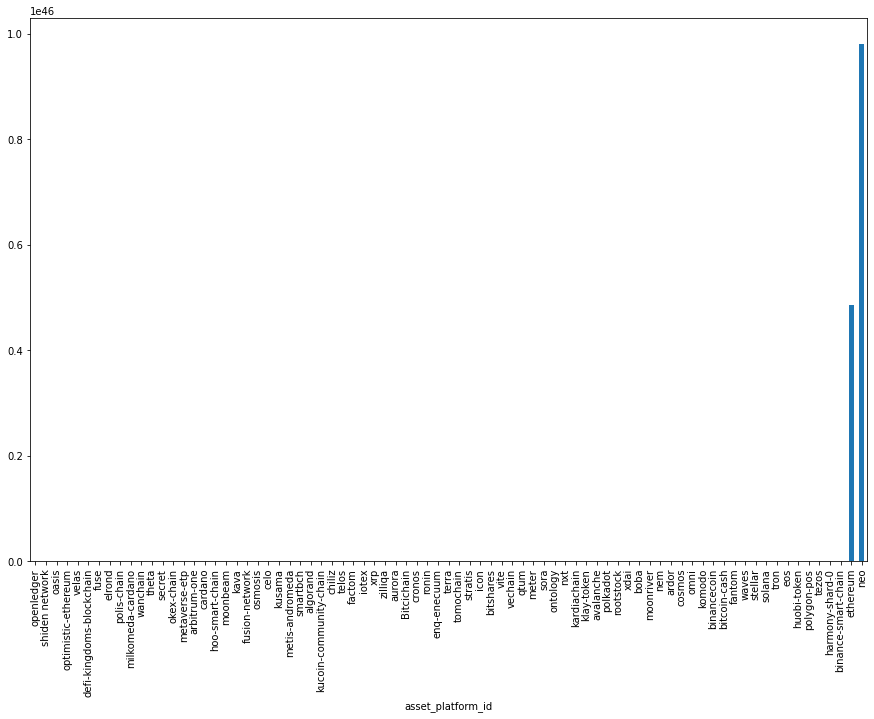

In [79]:
coin_df.groupby('asset_platform_id').agg(['mean'])[('atl_change_percentage_usd', 'mean')].sort_values().plot(kind = 'bar', figsize = (15,10))